# Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Verilerin Getirilmesi

In [2]:
columns=['BranchId','Date_','StockId','Type','Quantity','Unit','MovementType','FicheNo','FicheNoText','StockLink']
data_2021 = pd.read_excel('csv/stock-movement-2021.xlsx')
data_2022 = pd.read_excel('csv/stock-movement-2022.xlsx')

# Sadece Un Verilerinin Alma

In [4]:
data_2021.columns = columns
data_2022.drop(labels=['id'],axis= 1, inplace=True)
data = pd.concat([data_2021[data_2021.StockId == 2], data_2022[data_2022.StockId == 2]], axis = 0, ignore_index=True)
print('Orjinal Veri Uzunluğu: ', len(data_2022))
print('Sadece Un Verisinin Uzunluğu: ',len(data))

Orjinal Veri Uzunluğu:  146946
Sadece Un Verisinin Uzunluğu:  4337


# Veriye Bakış

In [5]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,Unit,MovementType,FicheNo,FicheNoText,StockLink
0,90,2020-12-31,2,1,78850.0,KG,Devir,0,DEVIR,NaN
1,4,2021-06-03,2,1,30.0,KG,Iç Tedarik,0,A90000000261270,NaN
2,90,2021-01-15,2,1,0.0,KG,Tedarikçiden Gelen Mal,0,000000000321949,NaN
3,90,2021-01-15,2,1,25000.0,KG,Tedarikçiden Gelen Mal,0,TZD202100000141,NaN
4,90,2021-01-18,2,1,15000.0,KG,Tedarikçiden Gelen Mal,0,TZD202100000163,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BranchId      4337 non-null   int64  
 1   Date_         4337 non-null   object 
 2   StockId       4337 non-null   int64  
 3   Type          4337 non-null   int64  
 4   Quantity      4337 non-null   float64
 5   Unit          4337 non-null   object 
 6   MovementType  4337 non-null   object 
 7   FicheNo       4337 non-null   int64  
 8   FicheNoText   4337 non-null   object 
 9   StockLink     4032 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 339.0+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BranchId,4337.0,38.949504,43.174039,0.0,2.00,4.000,90.0,90.0
StockId,4337.0,2.000000,0.000000,2.0,2.00,2.000,2.0,2.0
Type,4337.0,-0.859811,0.510671,-1.0,-1.00,-1.000,-1.0,1.0
Quantity,4337.0,2183.478755,5545.352897,0.0,0.76,29.746,2350.0,96840.0
FicheNo,4337.0,0.000000,0.000000,0.0,0.00,0.000,0.0,0.0


In [8]:
data.corr()

,BranchId,StockId,Type,Quantity,FicheNo
BranchId,1.000000,NaN,0.322877,0.460771,NaN
StockId,NaN,NaN,NaN,NaN,NaN
Type,0.322877,NaN,1.000000,0.695384,NaN
Quantity,0.460771,NaN,0.695384,1.000000,NaN
FicheNo,NaN,NaN,NaN,NaN,NaN


In [9]:
data.groupby(['MovementType'])['Quantity'].sum()

MovementType
Devir                      272530.000
Gönderilen Mal                 30.000
Iade                            1.000
Iç Tedarik                     30.000
Tedarikçiden Gelen Mal    4660500.000
Üretime Giden Mal         4536656.361
Name: Quantity, dtype: float64

## Gereksiz kolonların düşürülmesi

In [10]:
data.drop(labels=['Unit','FicheNo'], axis = 1, inplace = True)

In [11]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,MovementType,FicheNoText,StockLink
0,90,2020-12-31,2,1,78850.0,Devir,DEVIR,NaN
1,4,2021-06-03,2,1,30.0,Iç Tedarik,A90000000261270,NaN
2,90,2021-01-15,2,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN
3,90,2021-01-15,2,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN
4,90,2021-01-18,2,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN


In [12]:
# dates Beginning 2020-12-31
data['Date_'] = pd.to_datetime(data['Date_'].astype('str'), infer_datetime_format = True)
data['day_of_year'] = data['Date_'].dt.dayofyear
data['day_of_year'] = pd.DataFrame(data['day_of_year'])
data['day_numbers'] = (data['Date_'] - min(data['Date_'])).dt.days
data['day_of_year'] = data['day_of_year'].replace([366],[0])

In [13]:
data.head()

,BranchId,Date_,StockId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers
0,90,2020-12-31,2,1,78850.0,Devir,DEVIR,NaN,0,0
1,4,2021-06-03,2,1,30.0,Iç Tedarik,A90000000261270,NaN,154,154
2,90,2021-01-15,2,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN,15,15
3,90,2021-01-15,2,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN,15,15
4,90,2021-01-18,2,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN,18,18


## Features Engineering

In [16]:
data.drop(data[data['StockId'] != 2].index, inplace=True)

In [17]:
data['month'] = data['Date_'].dt.month
data['day_of_month'] = data['Date_'].dt.day
data['week_of_year'] = data['Date_'].dt.weekofyear
data['day_of_week'] = data['Date_'].dt.dayofweek
data["is_wknd"] = data['Date_'].dt.weekday // 5
# Aşağıdaki özellikleri OLS raporunda p değeri 0.05 in üstünde çıktığı için koymamayı tercih ettim.
#data['is_month_start'] = data['Date_'].dt.is_month_start.astype(int)
#data['is_month_end'] = data['Date_'].dt.is_month_end.astype(int)

In [18]:
data.drop(labels=['StockId','Date_'], axis = 1, inplace = True)

In [19]:
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd
0,90,1,78850.0,Devir,DEVIR,NaN,0,0,12,31,53,3,0
1,4,1,30.0,Iç Tedarik,A90000000261270,NaN,154,154,6,3,22,3,0
2,90,1,0.0,Tedarikçiden Gelen Mal,000000000321949,NaN,15,15,1,15,2,4,0
3,90,1,25000.0,Tedarikçiden Gelen Mal,TZD202100000141,NaN,15,15,1,15,2,4,0
4,90,1,15000.0,Tedarikçiden Gelen Mal,TZD202100000163,NaN,18,18,1,18,3,0,0


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BranchId,4337.0,38.949504,43.174039,0.0,2.00,4.000,90.0,90.0
Type,4337.0,-0.859811,0.510671,-1.0,-1.00,-1.000,-1.0,1.0
Quantity,4337.0,2183.478755,5545.352897,0.0,0.76,29.746,2350.0,96840.0
day_of_year,4337.0,169.998617,102.195132,0.0,90.00,155.000,263.0,365.0
day_numbers,4337.0,340.842518,150.461148,0.0,244.00,352.000,460.0,588.0
month,4337.0,5.921605,3.394745,1.0,3.00,6.000,9.0,12.0
day_of_month,4337.0,21.206825,9.704935,1.0,13.00,24.000,30.0,31.0
week_of_year,4337.0,24.460918,14.562323,1.0,13.00,22.000,38.0,53.0
day_of_week,4337.0,2.582430,1.846058,0.0,1.00,3.000,4.0,6.0
is_wknd,4337.0,0.176620,0.381391,0.0,0.00,0.000,0.0,1.0


İlk devir haricindeki devir verileri silinmesi gerek çünkü kümülatif toplamda zaten hesaplanıyor ve bunlar outlier veriler

In [21]:
ilk_devir = data.iloc[[0]]
devirsiz = data[data['MovementType']!= 'Devir']
data = pd.concat([ilk_devir, devirsiz], axis = 0)

   BranchId  Type  Quantity            MovementType      FicheNoText  \
0        90     1   78850.0                   Devir            DEVIR   
1         4     1      30.0              Iç Tedarik  A90000000261270   
2        90     1       0.0  Tedarikçiden Gelen Mal  000000000321949   
3        90     1   25000.0  Tedarikçiden Gelen Mal  TZD202100000141   
4        90     1   15000.0  Tedarikçiden Gelen Mal  TZD202100000163   

  StockLink  day_of_year  day_numbers  month  day_of_month  week_of_year  \
0       NaN            0            0     12            31            53   
1       NaN          154          154      6             3            22   
2       NaN           15           15      1            15             2   
3       NaN           15           15      1            15             2   
4       NaN           18           18      1            18             3   

   day_of_week  is_wknd  
0            3        0  
1            3        0  
2            4        0  
3     

# Burası Önemli

Veride 480. gününde çok fazla alış oluyor. Bunun sebebi ise 480. gün (25 Nisan 2022) bir hafta un zammının ertelendiği haberi. Zamdan önce bir haftadan kısa sürede 200 ton un girmiş. Bu da son 15 ayın toplam stoğuna eşdeğer.

Aşağıdaki satırı incelemek için çalıştırdım.

In [22]:
data = data[data['day_numbers'] <= 479]

# Günlük Toplam Un Verileri

In [23]:
sum = 0
sum_list = np.array([])
days = data['day_numbers'].unique()
days = np.sort(days)
for day in days: #0
    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):
        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
    print(day,' is ', sum)
    #Kümülatif toplam için aşağıdaki satırı sil
    sum = 0

"\nsum = 0\nsum_list = np.array([])\ndays = data['day_numbers'].unique()\ndays = np.sort(days)\nfor day in days: #0\n    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):\n        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) \n    sum_list = np.append(sum_list, sum)\n    print(day,' is ', sum)\n    #Kümülatif toplam için aşağıdaki satırı sil\n    sum = 0\n    \n"

# Günlük  Kümülatif Toplam Un Grafiği

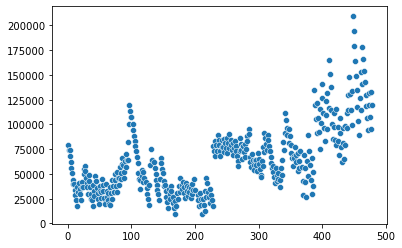

<Figure size 3600x3600 with 0 Axes>

In [24]:
sum = 0
sum_list = np.array([])
days = data['day_numbers'].unique()
days = np.sort(days)
for day in days: #2 - 588
    for i in range(len(data[data['day_numbers']==day]['day_numbers'])):
        sum = sum  + (np.array(data[data['day_numbers'] == day]['Quantity'])[i] * np.array(data[data['day_numbers'] == day]['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
sns.scatterplot(x= days, y=sum_list)
plt.figure(figsize = (50,50))
plt.show()

In [25]:
sum = 0
sum_list = np.array([])
data = data.sort_values(by=['day_numbers'])
for i in range(len(data['day_numbers'])):
    sum = sum  + (np.array(data['Quantity'])[i] * np.array(data['Type'])[i]) 
    sum_list = np.append(sum_list, sum)
data['Cumulative'] = sum_list

In [26]:
data['FicheNoText'] = data['FicheNoText'].astype(str)

## Sadece Un Verisini Excel ve Csv Dosyalarına Kaydetme

In [27]:
file_name = "un_2021_2022.xlsx"
data.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [28]:
file_name = "un_2021_2022.csv"
data.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.


# Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['MovementType'] = le.fit_transform(data['MovementType'])
data['FicheNoText'] = le.fit_transform(data['FicheNoText'])
data['StockLink'] = le.fit_transform(data['StockLink'])
data['FicheNoText'] = pd.to_numeric(data['FicheNoText'])
data.head()

,BranchId,Type,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,90,1,78850.0,0,1056,18,0,0,12,31,53,3,0,78850.0
1655,90,-1,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,90,-1,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,90,-1,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,90,-1,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


In [30]:
data.drop(labels=['BranchId','Type'], axis = 1, inplace = True)

## Standard Scale

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size = 0.2)

# XG-Boost

In [33]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)
for i in range(len(preds)):
    print(np.array(X_test['day_numbers'])[i], ' day preds is ', preds[i], '|| index = ', X_test.index[i])

151  day preds is  46823.43 || index =  1044
478  day preds is  132700.86 || index =  3519
196  day preds is  36234.562 || index =  136
106  day preds is  77493.23 || index =  1582
214  day preds is  18823.537 || index =  1967
218  day preds is  43991.09 || index =  1974
326  day preds is  38644.566 || index =  1735
330  day preds is  49002.883 || index =  1743
12  day preds is  26917.932 || index =  1673
317  day preds is  77501.39 || index =  1723
455  day preds is  124910.945 || index =  2981
455  day preds is  118115.16 || index =  2731
211  day preds is  17808.053 || index =  1244
90  day preds is  48168.496 || index =  393
331  day preds is  50851.496 || index =  1746
455  day preds is  122088.36 || index =  2623
151  day preds is  44123.695 || index =  251
442  day preds is  135767.83 || index =  4033
116  day preds is  51595.47 || index =  1606
284  day preds is  93244.07 || index =  465
287  day preds is  63302.457 || index =  1095
120  day preds is  47195.793 || index =  805


# Light GBM

In [34]:
import lightgbm as lgb

In [35]:
lgb_model = lgb.LGBMRegressor(colsample_bytree=1,
                             learning_rate=0.01,
                             max_depth=9,
                             n_estimators = 1500)
lgb_model.fit(X_train, y_train)
predicts = lgb_model.predict(X_test)
for i in range(len(predicts)):
    print(np.array(X_test['day_numbers'])[i], ' day preds is ', predicts[i])

151  day preds is  44467.017813105034
478  day preds is  131414.1164411024
196  day preds is  34419.09148563584
106  day preds is  83530.39439229324
214  day preds is  20988.68276148424
218  day preds is  35758.05988040689
326  day preds is  39257.89464866234
330  day preds is  50623.17844483246
12  day preds is  27874.819956251842
317  day preds is  77284.40905145541
455  day preds is  122532.23562564443
455  day preds is  120107.62830338761
211  day preds is  16633.82102643982
90  day preds is  47832.60795951208
331  day preds is  50908.342319891344
455  day preds is  124886.33477506084
151  day preds is  44091.93868008517
442  day preds is  142391.78302533083
116  day preds is  49268.87772362105
284  day preds is  94363.60073797408
287  day preds is  65461.265483068055
120  day preds is  46440.66561352569
307  day preds is  74228.86380480192
373  day preds is  48909.47280090066
455  day preds is  123158.54130880999
144  day preds is  32352.8881209246
120  day preds is  46117.6677819

## Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [37]:
regressor = RandomForestRegressor(n_estimators=1600,
                                 min_samples_split=5,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=10,
                                 bootstrap=True)
regressor.fit(X_train, y_train)
rfg_pred = regressor.predict(X_test)

In [38]:
for i in range(len(rfg_pred)):
    print(np.array(X_test['day_numbers'])[i], ' day preds is ', rfg_pred[i], '|| index = ',X_test.index[i])

151  day preds is  43899.21285858605 || index =  1044
478  day preds is  131834.65318701218 || index =  3519
196  day preds is  33915.4696147467 || index =  136
106  day preds is  84549.45905258453 || index =  1582
214  day preds is  17206.076746616025 || index =  1967
218  day preds is  39410.245348291675 || index =  1974
326  day preds is  43359.389779162404 || index =  1735
330  day preds is  50000.11491445582 || index =  1743
12  day preds is  27017.00137250521 || index =  1673
317  day preds is  77932.27755262947 || index =  1723
455  day preds is  122661.32548730083 || index =  2981
455  day preds is  122777.01366727927 || index =  2731
211  day preds is  16390.23845336832 || index =  1244
90  day preds is  48067.900979517326 || index =  393
331  day preds is  53388.706132543 || index =  1746
455  day preds is  123351.15045425574 || index =  2623
151  day preds is  44471.79139258266 || index =  251
442  day preds is  137873.13703271077 || index =  4033
116  day preds is  51494.55

# R2 SCORE

In [39]:
print('LİGHT-GBM R2 Score: ',r2_score(y_test, predicts))
print('XG-Boost R2 Score: ',r2_score(y_test, preds))
print('Random Forest Regressor R2 Score: ',r2_score(y_test, rfg_pred))

LİGHT-GBM R2 Score:  0.9346634664759117
XG-Boost R2 Score:  0.9197077554477845
Random Forest Regressor R2 Score:  0.9296663163562663


##  MAE SCORE

In [40]:
print('LİGHT-GBM MAE: ',mean_absolute_error(y_test, predicts))
print('XG-BOOST MAE: ',mean_absolute_error(y_test, preds))
print('Random Forest Regressor MAE: ',mean_absolute_error(y_test, rfg_pred))

LİGHT-GBM MAE:  5806.249197464208
XG-BOOST MAE:  5749.430663446693
Random Forest Regressor MAE:  5793.042775906487


# Mean Squared Error

In [41]:
print('LİGHT-GBM MSE Score:',np.sqrt(mean_squared_error(y_test,predicts)))
print('XG-BOOST MSE Score:',np.sqrt(mean_squared_error(y_test,preds)))
print('RANDOM FOREST MSE Score:',np.sqrt(mean_squared_error(y_test,rfg_pred)))

LİGHT-GBM MSE Score: 9113.44770554058
XG-BOOST MSE Score: 10102.793141547387
RANDOM FOREST MSE Score: 9455.540153516651


# Son %10'luk kısım predict

In [42]:
samples_len = len(data) * 0.1
sample_data = data.iloc[(-1 * int(samples_len)):-1]

## Orjinal Kümülatif Veriler Üzerinden Kontrol Etmek

In [43]:
for i in range(len(sample_data['Cumulative']) - 1):
    if sample_data['Cumulative'].iloc[i + 1] > sample_data['Cumulative'].iloc[i]:
        print('Alınan miktar : ', (np.abs(sample_data['Cumulative'].iloc[i + 1] - sample_data['Cumulative'].iloc[i])), 
              '| Gün: ', sample_data['day_numbers'].iloc[i + 1],
             'index',sample_data.index[i + 1],
             '| Önceki Miktar:',sample_data['Cumulative'].iloc[i],
             '| Sonraki Miktar:',sample_data['Cumulative'].iloc[i +1],)
                

Alınan miktar :  25000.0 | Gün:  459 index 2330 | Önceki Miktar: 85860.54800000013 | Sonraki Miktar: 110860.54800000013
Alınan miktar :  25000.0 | Gün:  459 index 3346 | Önceki Miktar: 109810.54800000013 | Sonraki Miktar: 134810.54800000013
Alınan miktar :  25000.0 | Gün:  461 index 3347 | Önceki Miktar: 109210.54800000013 | Sonraki Miktar: 134210.54800000013
Alınan miktar :  25000.0 | Gün:  461 index 2331 | Önceki Miktar: 130410.54800000013 | Sonraki Miktar: 155410.54800000013
Alınan miktar :  25000.0 | Gün:  463 index 3348 | Önceki Miktar: 136760.54800000013 | Sonraki Miktar: 161760.54800000013
Alınan miktar :  25000.0 | Gün:  463 index 2332 | Önceki Miktar: 160210.54800000013 | Sonraki Miktar: 185210.54800000013
Alınan miktar :  25000.0 | Gün:  473 index 3375 | Önceki Miktar: 91160.54800000013 | Sonraki Miktar: 116160.54800000013
Alınan miktar :  25000.0 | Gün:  473 index 2359 | Önceki Miktar: 110460.54800000013 | Sonraki Miktar: 135460.54800000013
Alınan miktar :  22500.0 | Gün:  4

## Makine Öğrenmesi Verileri Üzerinden Kontrol Etmek

In [44]:
rfg_pred = regressor.predict(sample_data.iloc[:, :-1])
for i in range(len(rfg_pred) - 1):
    if rfg_pred[i + 1] > rfg_pred[i]:    
        print('Alınan miktar: ',(rfg_pred[i + 1] - rfg_pred[i]), 
              '|Gün:', sample_data['day_numbers'].iloc[i + 1],
              '|index:',sample_data.index[i + 1],
             '|Önceki Miktar:',rfg_pred[i], 
              '|Sonraki Miktar:', rfg_pred[i + 1])

Alınan miktar:  3207.0033349545265 |Gün: 452 |index: 2957 |Önceki Miktar: 164660.64650446837 |Sonraki Miktar: 167867.6498394229
Alınan miktar:  22.479843224893557 |Gün: 453 |index: 4167 |Önceki Miktar: 156668.5780786483 |Sonraki Miktar: 156691.0579218732
Alınan miktar:  92.18257442650793 |Gün: 455 |index: 3791 |Önceki Miktar: 126050.16456073214 |Sonraki Miktar: 126142.34713515865
Alınan miktar:  190.09582016598142 |Gün: 455 |index: 3832 |Önceki Miktar: 126142.34713515865 |Sonraki Miktar: 126332.44295532463
Alınan miktar:  2665.8241210278356 |Gün: 455 |index: 3816 |Önceki Miktar: 123473.12693396445 |Sonraki Miktar: 126138.95105499229
Alınan miktar:  458.3193118041672 |Gün: 455 |index: 3838 |Önceki Miktar: 124983.05571154221 |Sonraki Miktar: 125441.37502334638
Alınan miktar:  793.1704642031254 |Gün: 455 |index: 4169 |Önceki Miktar: 125441.37502334638 |Sonraki Miktar: 126234.5454875495
Alınan miktar:  4074.719369464103 |Gün: 455 |index: 3831 |Önceki Miktar: 122508.26599832624 |Sonraki Mik

Alınan miktar:  2211.8667114892887 |Gün: 455 |index: 2551 |Önceki Miktar: 120421.93270463299 |Sonraki Miktar: 122633.79941612227
Alınan miktar:  165.56294610684563 |Gün: 455 |index: 2550 |Önceki Miktar: 122633.79941612227 |Sonraki Miktar: 122799.36236222912
Alınan miktar:  933.2910312816966 |Gün: 456 |index: 4038 |Önceki Miktar: 111927.35931561374 |Sonraki Miktar: 112860.65034689543
Alınan miktar:  638.4815356873587 |Gün: 456 |index: 3873 |Önceki Miktar: 111288.87777992638 |Sonraki Miktar: 111927.35931561374
Alınan miktar:  1492.7072605918074 |Gün: 457 |index: 3154 |Önceki Miktar: 96441.70866328606 |Sonraki Miktar: 97934.41592387787
Alınan miktar:  13425.914102129143 |Gün: 459 |index: 4172 |Önceki Miktar: 97144.8447777153 |Sonraki Miktar: 110570.75887984445
Alınan miktar:  13659.118479957979 |Gün: 459 |index: 2330 |Önceki Miktar: 110570.75887984445 |Sonraki Miktar: 124229.87735980243
Alınan miktar:  2294.0702850870002 |Gün: 459 |index: 3346 |Önceki Miktar: 121935.80707471543 |Sonraki M

In [45]:
print('Random Forest Regressor R2 Score: ',r2_score(sample_data.iloc[:, -1], rfg_pred))
print('Random Forest Regressor MAE: ',mean_absolute_error(sample_data.iloc[:, -1], rfg_pred))
print('RANDOM FOREST MSE Score:',np.sqrt(mean_squared_error(sample_data.iloc[:, -1],rfg_pred)))

Random Forest Regressor R2 Score:  0.8783619615213366
Random Forest Regressor MAE:  4388.0008364746745
RANDOM FOREST MSE Score: 6109.409104121642


In [46]:
data.tail()

,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
3423,203.18,5,968,11,113,478,4,23,16,5,1,124224.45
3435,17.00,5,968,11,113,478,4,23,16,5,1,124207.45
3436,15.00,5,970,12,113,478,4,23,16,5,1,124192.45
2870,4150.00,5,956,1,113,478,4,23,16,5,1,120042.45
4290,500.00,5,955,3,113,478,4,23,16,5,1,119542.45


In [48]:
data.head()

,Quantity,MovementType,FicheNoText,StockLink,day_of_year,day_numbers,month,day_of_month,week_of_year,day_of_week,is_wknd,Cumulative
0,78850.0,0,1056,18,0,0,12,31,53,3,0,78850.0
1655,2900.0,5,0,1,2,2,1,2,53,5,1,75950.0
1656,1850.0,5,1,2,2,2,1,2,53,5,1,74100.0
1657,100.0,5,61,1,3,3,1,3,53,6,1,74000.0
1658,3550.0,5,2,1,4,4,1,4,1,0,0,70450.0


## Backward Elimination

In [49]:
import statsmodels.api as sm 

In [50]:
r_ols = sm.OLS(endog=data.iloc[:, -1], exog=data.iloc[:, :-1])
r = r_ols.fit()

In [51]:
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:             Cumulative   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.928
Method:                 Least Squares   F-statistic:                              3956.
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                        0.00
Time:                        13:17:58   Log-Likelihood:                         -38765.
No. Observations:                3397   AIC:                                  7.755e+04
Df Residuals:                    3386   BIC:                                  7.762e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

##### Üstekki raporda p değerine bakarak genelde 0.05'in üstünde olan columnları atabilirsin.

## GridSearch & RandomizedSearchCV

Random Forest = {'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}
 
LİGHT-GBM = {'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 9,
 'n_estimators': 1500}

## Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
print(cross_val_score(regressor,data.iloc[:, :-1], data['Cumulative'], scoring = 'neg_mean_absolute_error', cv = 5))

[-15774.91244428 -16724.20851463  -9994.2651742  -40125.25466322
 -28929.29267289]


In [57]:
print(cross_val_score(lgb_model,data.iloc[:, :-1], data.iloc[:, -1] , scoring = 'neg_mean_absolute_error', cv = 5))

[-13237.36491436 -20318.80113502  -9726.33667343 -27134.02440062
 -29180.02640849]


In [58]:
print(cross_val_score(xgb_model,data.iloc[:, :-1], data.iloc[:, -1] , scoring = 'neg_mean_absolute_error', cv = 5))

[-17063.87369328 -15580.55035757  -9254.04073718 -40691.25695991
 -21577.35860747]
